In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import local classes
import sys
sys.path.append(r'C:\Users\sieme\OneDrive\Documenten\16. TA, Probabilistic Design\bivariate\src')

import bivariate.class_dataset
import bivariate.class_multivar
import bivariate.class_emperical

In [3]:
# Import data
AX1, AX2 = np.genfromtxt('data_axle.csv', delimiter=",", unpack = True)

In [4]:
# Create object of class Emperical_data
AX1_object = bivariate.class_emperical.Emperical_data(time_series_data =  AX1, data_title = 'AX1', data_units = 'Axle load [kN]')
AX2_object = bivariate.class_emperical.Emperical_data(time_series_data =  AX2, data_title = 'AX2', data_units = 'Axle load [kN]')

In [5]:
# F STRING FORMATTING, USE DECIMALS AND KEEP IN MIND 
# BENJAMIN ALREADY DID THAT, WHILE PLOTTINIG FIGURES FOR BIVARIATE, AND OR OR PLOTS


# if not compare:
#             if p < 0.01:
#                 ax.text(.01, .01, r"$(P=$" + "{:.2e})".format(p), ha="left", va="bottom", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.2e}".format(p) + ")", fontsize=18)
#             else:
#                 ax.text(.01, .01, r"$(P=$" + "{:.4f})".format(p), ha="left", va="bottom", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.4f}".format(p) + ")", fontsize=18)
#         else:
#             if p < 0.01:
#                 ax.text(.01, .07, r"$(P_{2}=$" + "{:.2e})".format(p), ha="left", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.2e}".format(p) + ")", fontsize=18)
#             else:
#                 ax.text(.01, .07, r"$(P_{2}=$" + "{:.4f})".format(p), ha="left", transform=ax.transAxes)
#                 ax.set_title("$p_{AND}$" + " (={:.4f}".format(p) + ")", fontsize=18)
#         ax.set_xlabel('$x_' + str(x_index) + '$', fontsize=15)
#         ax.set_ylabel('$x_' + str(1 - x_index) + '$', fontsize=15)
#         return f, ax


print(f'{0.32457:8.2f}')

    0.32


In [6]:
# Print summary of object
AX1_object.data_summary()

### ONLY USE 4 SIGNIFICANT FIGURES OR 3 DECIMALS IF INT. <10 
print()

For the data: AX1
    Number of observations: 992
    Minimum and maximum: (15.48, 73.71)
    Mean: 38.215927419354834
    Variance: 100.49652426516063
    Skewness: 0.360847522361441
    Kurtosis: -0.20117603959064034



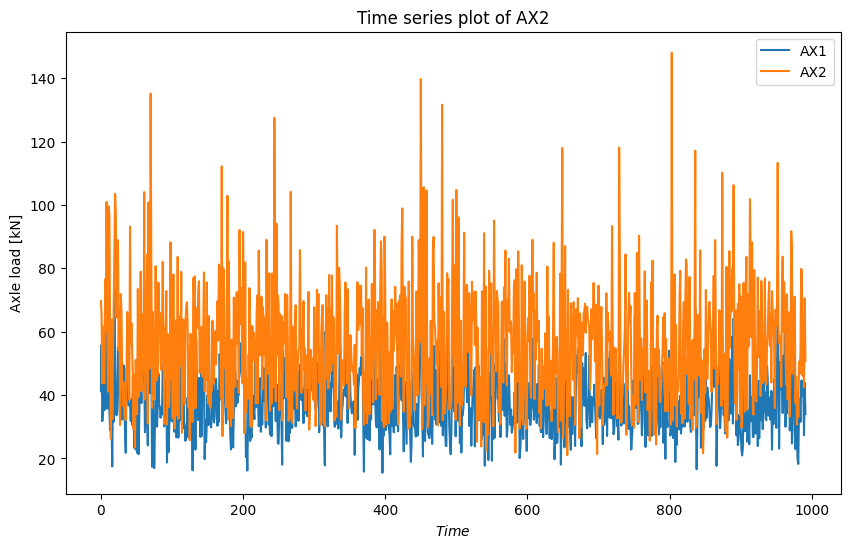

In [7]:
fig1, ax1 = AX1_object.time_series_plot()
AX2_object.time_series_plot(ax = ax1, fig = fig1);

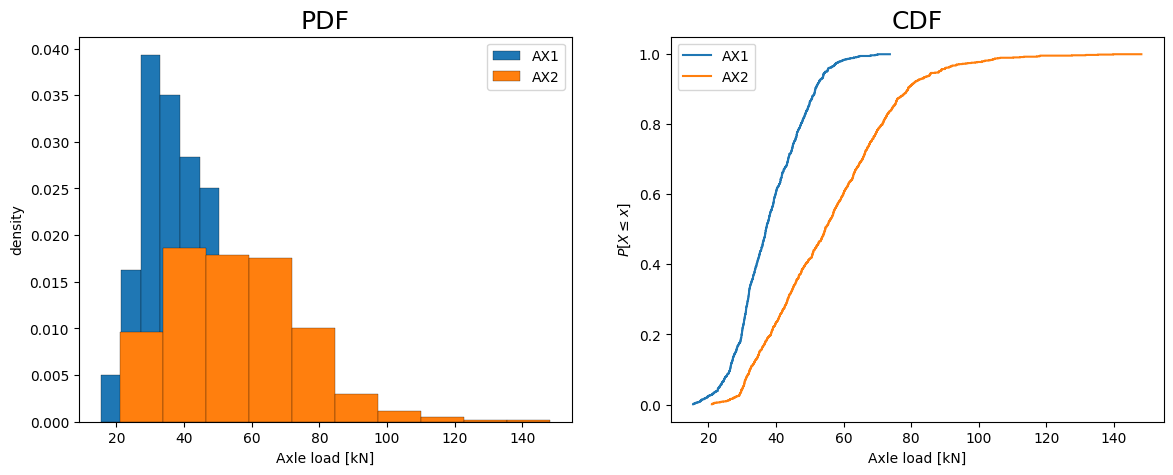

In [8]:
fig2, ax2 = AX1_object.PDF_and_ECDF_plot();
AX2_object.PDF_and_ECDF_plot(axes = ax2, fig = fig2);

In [9]:
# Fit distributions
AX1_object.fitting_distributions(['lognormal', 'gumbel', 'exponential'])
AX2_object.fitting_distributions(['lognormal', 'gumbel', 'exponential'])




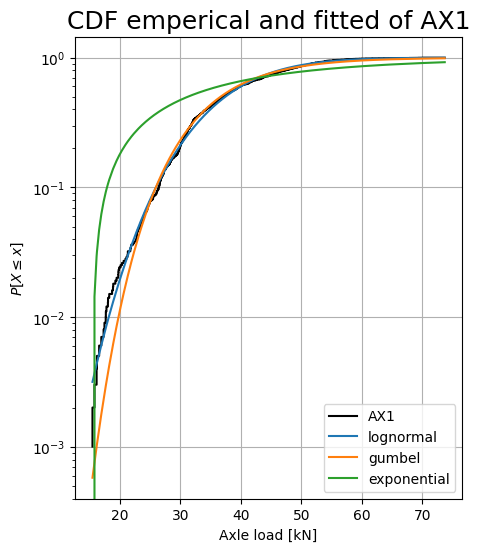

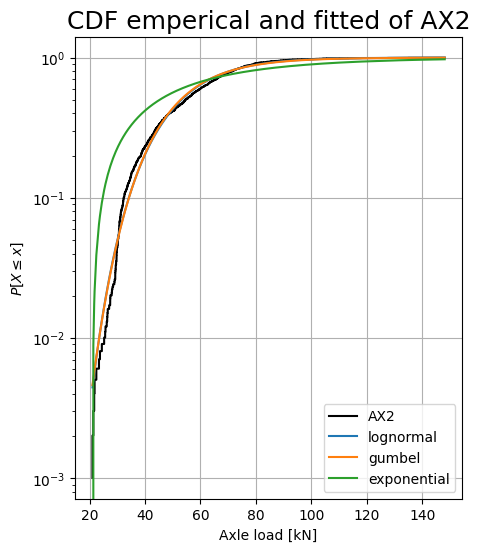

In [10]:
AX1_object.graphical_assessing_goodness_of_fit();
AX2_object.graphical_assessing_goodness_of_fit();


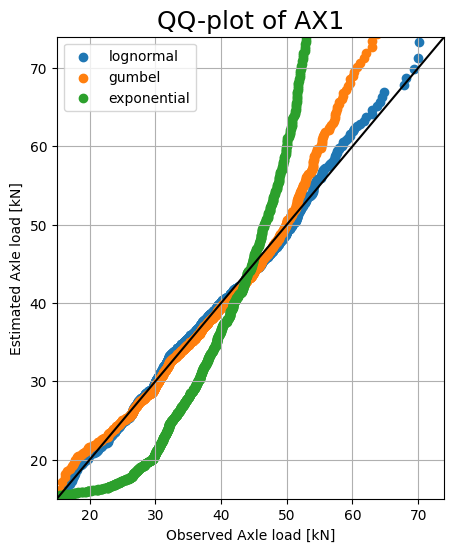

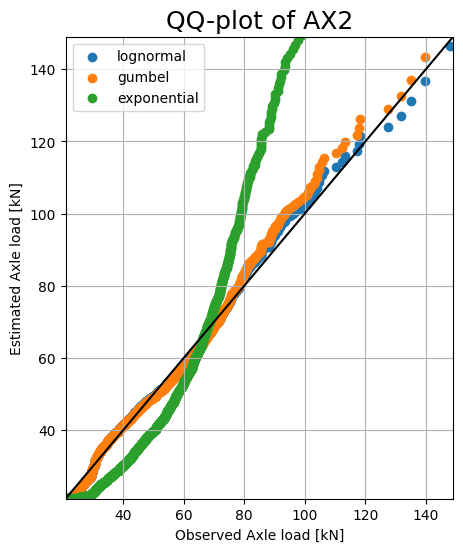

In [11]:
AX1_object.QQ_plot();
AX2_object.QQ_plot();

In [12]:
AX1_object.KS_test()
AX2_object.KS_test()

The Kolmogorov-Smirnov test for the lognormal distribution gives a p-value of 0.058
The Kolmogorov-Smirnov test for the gumbel distribution gives a p-value of 0.097
The Kolmogorov-Smirnov test for the exponential distribution gives a p-value of 0.0
The Kolmogorov-Smirnov test for the lognormal distribution gives a p-value of 0.024
The Kolmogorov-Smirnov test for the gumbel distribution gives a p-value of 0.011
The Kolmogorov-Smirnov test for the exponential distribution gives a p-value of 0.0


{'lognormal': 0.02441155489580471,
 'gumbel': 0.011005900854806619,
 'exponential': 7.687327601536e-34}

## Tabulated overview

In [13]:
AX1_object.tabulated_results()

,F(x) = 0.05,F(x) = 0.25,F(x) = 0.5,F(x) = 0.75,F(x) = 0.95
Emperical,23.357,30.818,37.090,45.412,54.878
lognormal,23.108,31.117,37.443,44.469,55.966
gumbel,23.602,30.469,36.646,44.482,59.848
exponential,16.646,22.021,31.239,46.999,83.591
